In [46]:
#### To do
## Create input
## Parse input?
## check my CRS
## I'm doubling my work by checking the intersection and then doing an intersection
## MAYBE ASK--Will the input be ZIP codes or ZCTA? That is, if a zip code without a matching ZCTA is inputted (e.g. 20013) should it be matched with its ZCTA (e.g. 20002), or should the program say that the input is not valid?
## MAYBE ASK--what is the cutoff percentage?

#import packages
import geopandas as gpd
import contextily
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets


In [136]:
from IPython.display import display

In [47]:
#load data
zcta = gpd.read_file('dc_zcta.gpkg')
tracts = gpd.read_file('dc_tracts.gpkg')

In [48]:
#standardize crs
zcta=zcta.to_crs('epsg:3857')
tracts=tracts.to_crs('epsg:3857')


  ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20 FUNCSTAT20   ALAND20  AWATER20  \
0     20007   20007        B5   G6350          S   8002561   1801855   
1     20016   20016        B5   G6350          S  11476999    382453   
2     20260   20260        B5   G6350          S     51082         0   
3     20018   20018        B5   G6350          S   7816875     31550   
4     20418   20418        B5   G6350          S     29418         0   

    INTPTLAT20    INTPTLON20  \
0  +38.9177159  -077.0906354   
1  +38.9369089  -077.0900373   
2  +38.8835438  -077.0250324   
3  +38.9265762  -076.9744461   
4  +38.8928004  -077.0477644   

                                            geometry  
0  POLYGON ((-8583307.681 4709825.020, -8583306.4...  
1  POLYGON ((-8584931.059 4712272.168, -8584831.9...  
2  POLYGON ((-8574501.850 4704835.971, -8574501.8...  
3  POLYGON ((-8571766.853 4708852.037, -8571658.3...  
4  POLYGON ((-8577039.382 4706315.452, -8577038.9...  
  STATEFP COUNTYFP TRACTCE        GEOID   NA

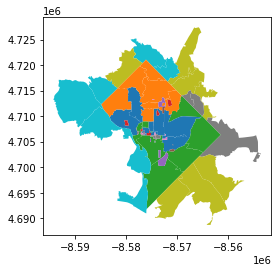

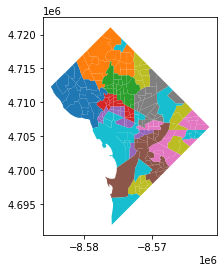

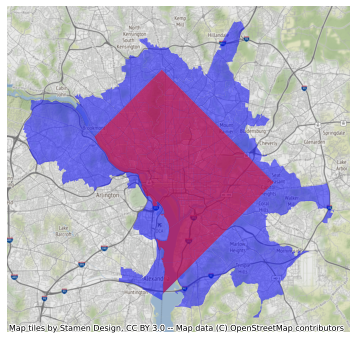

In [49]:
#glimpse data
print(zcta.head())
print(tracts.head())

#first plots
zcta.plot(column="GEOID20")
tracts.plot(column="TRACTCE")

#multilayered plot
fig, ax = plt.subplots(figsize=(12,6))
zcta.plot(ax=ax, color='blue', alpha=0.5)
tracts.plot(ax=ax, color='red', alpha=0.5)
contextily.add_basemap(ax)
ax.set_axis_off()

In [137]:
btb = widgets.BoundedIntText(
 value=7,
 min=0,
 max=10
 )
display(btb)

BoundedIntText(value=7, max=10)

In [138]:
w = widgets.IntSlider()
display(w)

IntSlider(value=0)

In [120]:
#input arbitrary zip code
zip_input = "20013"
#myzip = zcta[zcta["GEOID20"] == zip_input]
myzip = zcta[zcta['ZCTA5CE20'] == zip_input]
print(myzip.head())

Empty GeoDataFrame
Columns: [ZCTA5CE20, GEOID20, CLASSFP20, MTFCC20, FUNCSTAT20, ALAND20, AWATER20, INTPTLAT20, INTPTLON20, geometry]
Index: []


In [116]:
#Get the geometry that matches the zip code
myzip_geom = zcta.loc[zcta['GEOID20'] == zip_input, 'geometry'].iloc[0]

#Filter tracts that intersect
intersecting_tracts = tracts[tracts.intersects(myzip_geom)]
print(intersecting_tracts.head())

    STATEFP COUNTYFP TRACTCE        GEOID   NAME            NAMELSAD  MTFCC  \
8        11      001  009604  11001009604  96.04  Census Tract 96.04  G5020   
103      11      001  009603  11001009603  96.03  Census Tract 96.03  G5020   
107      11      001  009602  11001009602  96.02  Census Tract 96.02  G5020   
111      11      001  007708  11001007708  77.08  Census Tract 77.08  G5020   
116      11      001  009902  11001009902  99.02  Census Tract 99.02  G5020   

    FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
8          S   503381   65762  +38.8931572  -076.9585043   
103        S   607400       0  +38.8918285  -076.9477195   
107        S  1306709   67073  +38.9035769  -076.9523616   
111        S   745809  129100  +38.8871944  -076.9606349   
116        S  1294556       0  +38.8717861  -076.9445542   

                                              geometry  
8    POLYGON ((-8567510.985 4705976.932, -8567429.2...  
103  POLYGON ((-8566742.991 4705957.339, -8566499.

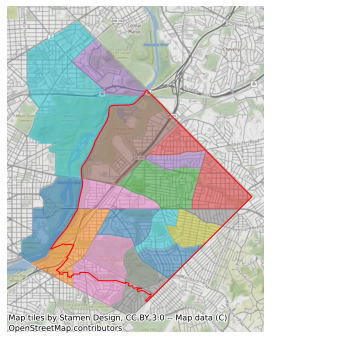

In [117]:
#multilayered plot
fig, ax = plt.subplots(figsize=(12,6))
intersecting_tracts.plot(ax=ax, column='TRACTCE', alpha=0.5)
myzip.plot(ax=ax, facecolor="none", edgecolor="red")
#tracts.plot(ax=ax, color='gray', alpha=0.1)
contextily.add_basemap(ax)
ax.set_axis_off()

  STATEFP COUNTYFP TRACTCE        GEOID   NAME            NAMELSAD  MTFCC  \
0      11      001  007201  11001007201  72.01  Census Tract 72.01  G5020   
1      11      001  007100  11001007100     71     Census Tract 71  G5020   

  FUNCSTAT   ALAND  AWATER  ... ZCTA5CE20 GEOID20 CLASSFP20 MTFCC20  \
0        S  781457  312419  ...     20388   20388        B5   G6350   
1        S  602223  149901  ...     20388   20388        B5   G6350   

  FUNCSTAT20 ALAND20 AWATER20   INTPTLAT20    INTPTLON20  \
0          S   86518   139552  +38.8724291  -076.9938997   
1          S   86518   139552  +38.8724291  -076.9938997   

                                            geometry  
0  POLYGON ((-8570629.039 4703530.004, -8570623.1...  
1  POLYGON ((-8570590.856 4703421.907, -8570610.4...  

[2 rows x 22 columns]


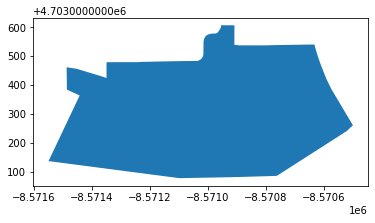

In [100]:
#create a df of the resulting intersections
res_intersection = gpd.overlay(intersecting_tracts, myzip, how='intersection',keep_geom_type=True)

res_intersection.plot()
print(res_intersection.head())

In [101]:

res_intersection['area']=res_intersection.geometry.area
res_intersection['frac_area']=res_intersection.geometry.area/myzip_geom.area
print(res_intersection[['TRACTCE','frac_area']])
print(res_intersection['frac_area'].sum())


  TRACTCE     frac_area
0  007201  1.000000e+00
1  007100  4.677195e-14
1.0000000000000002
